## Fake News Classifier Using LSTM

Dataset: https://www.kaggle.com/c/fake-news/data#

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.shape

(20800, 5)

In [8]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
###Drop Nan Values
df=df.dropna()


In [11]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [13]:
## Get the Dependent features
y=df['label']

In [14]:
X.shape

(18285, 4)

In [15]:
y.shape

(18285,)

In [17]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
tf.__version__

'2.8.2'

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [19]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [20]:
messages=X.copy()

In [21]:
messages['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [22]:
messages

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [26]:
messages.reset_index(inplace=True)

In [27]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [28]:
import nltk
import re
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
### Dataset Preprocessing
import tqdm
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in tqdm.tqdm(range(0, len(messages))):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

100%|██████████| 18285/18285 [00:26<00:00, 677.93it/s]


In [33]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [34]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [36]:
one_hot

<function keras.preprocessing.text.one_hot(input_text, n, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', analyzer=None)>

In [35]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[4403, 1113, 2760, 4233, 4311, 714, 2617, 3089, 3784, 152],
 [1423, 2979, 4056, 1866, 2098, 1422, 1053],
 [4796, 3252, 4867, 4795],
 [3216, 802, 3726, 338, 906, 4904],
 [362, 2098, 4568, 1342, 354, 4797, 2098, 3543, 4392, 4905],
 [3826,
  2432,
  4517,
  1305,
  4925,
  218,
  3414,
  2381,
  4592,
  793,
  661,
  263,
  2746,
  4491,
  1053],
 [1032, 1010, 4717, 3546, 978, 522, 3500, 1194, 214, 2356, 1653],
 [4260, 3548, 4288, 2890, 1771, 3592, 218, 4054, 214, 2356, 1653],
 [3231, 3314, 1934, 2738, 2589, 4294, 929, 3706, 218, 1560],
 [4771, 2384, 2132, 4647, 29, 1752, 1950, 4744],
 [149, 4936, 1686, 3169, 1860, 3746, 3093, 4144, 2750, 3963, 3037],
 [338, 4322, 4311, 4294, 218, 1771],
 [3865, 3345, 1199, 1001, 1915, 1074, 3159, 2545, 3934],
 [3615, 1417, 3683, 3936, 3461, 4109, 3765, 214, 2356, 1653],
 [4266, 1461, 66, 4900, 499, 214, 2356, 1653],
 [1222, 3258, 1056, 1677, 1239, 1225, 2793, 1370, 747, 2457],
 [1550, 3247, 2979],
 [3097, 3203, 3290, 1842, 218, 4809, 2839, 1053],
 [1163

In [37]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [38]:
onehot_repr[1]

[1423, 2979, 4056, 1866, 2098, 1422, 1053]

### Embedding Representation

In [39]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[4403 1113 2760 ...    0    0    0]
 [1423 2979 4056 ...    0    0    0]
 [4796 3252 4867 ...    0    0    0]
 ...
 [4470 4987 4613 ...    0    0    0]
 [  89 1771 2842 ...    0    0    0]
 [2338 4410  382 ...    0    0    0]]


In [40]:
embedded_docs[1]

array([1423, 2979, 4056, 1866, 2098, 1422, 1053,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [41]:
embedded_docs[0]

array([4403, 1113, 2760, 4233, 4311,  714, 2617, 3089, 3784,  152,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
len(embedded_docs),y.shape

In [42]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


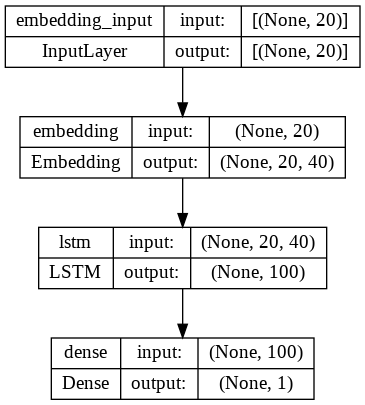

In [49]:
from keras.utils import plot_model
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [44]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [45]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [47]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 8s 10ms/step - loss: 0.3058 - accuracy: 0.8541 - val_loss: 0.1961 - val_accuracy: 0.9186
Epoch 2/10
192/192 [==============================] - 2s 8ms/step - loss: 0.1272 - accuracy: 0.9530 - val_loss: 0.2228 - val_accuracy: 0.9203
Epoch 3/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0798 - accuracy: 0.9730 - val_loss: 0.2066 - val_accuracy: 0.9168
Epoch 4/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0551 - accuracy: 0.9818 - val_loss: 0.2965 - val_accuracy: 0.9175
Epoch 5/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.3419 - val_accuracy: 0.9188
Epoch 6/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0316 - accuracy: 0.9891 - val_loss: 0.3657 - val_accuracy: 0.9171
Epoch 7/10
192/192 [==============================] - 1s 8ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.3736 - val_accuracy: 0.9094
Epoch

### Adding Dropout 

In [50]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Performance Metrics And Accuracy

In [51]:
y_pred=model.predict(X_test)

189/189 [==============================] - 1s 2ms/step


In [52]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[3419,    0],
       [2616,    0]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5665285832642917

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3419
           1       0.00      0.00      0.00      2616

    accuracy                           0.57      6035
   macro avg       0.28      0.50      0.36      6035
weighted avg       0.32      0.57      0.41      6035



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
